In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset (replace 'audit_data.csv' with the correct file path)
data = pd.read_csv('audit_data.csv')

# View the first few rows to understand the structure
print(data.head())


   Sector_score LOCATION_ID  PARA_A  Score_A  Risk_A  PARA_B  Score_B  Risk_B  \
0          3.89          23    4.18      0.6   2.508    2.50      0.2   0.500   
1          3.89           6    0.00      0.2   0.000    4.83      0.2   0.966   
2          3.89           6    0.51      0.2   0.102    0.23      0.2   0.046   
3          3.89           6    0.00      0.2   0.000   10.80      0.6   6.480   
4          3.89           6    0.00      0.2   0.000    0.08      0.2   0.016   

   TOTAL  numbers  ...  RiSk_E  History  Prob  Risk_F  Score  Inherent_Risk  \
0   6.68      5.0  ...     0.4        0   0.2     0.0    2.4          8.574   
1   4.83      5.0  ...     0.4        0   0.2     0.0    2.0          2.554   
2   0.74      5.0  ...     0.4        0   0.2     0.0    2.0          1.548   
3  10.80      6.0  ...     0.4        0   0.2     0.0    4.4         17.530   
4   0.08      5.0  ...     0.4        0   0.2     0.0    2.0          1.416   

   CONTROL_RISK  Detection_Risk  Audit

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import pandas as pd

# Define features and target
X = data.drop(columns=['Risk'])  # All columns except 'Risk'
y = data['Risk']  # The target column 'Risk'

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['number']).columns

# Preprocessing pipeline for numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values by imputing the mean
    ('scaler', StandardScaler())  # Standardize numerical features
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values in categorical data
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Encode categorical data as one-hot vectors
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Apply preprocessing to data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and transform the training data, transform the test data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build a simple model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Assuming binary classification (fraud/non-fraud)
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"TensorFlow Model Accuracy: {accuracy:.2f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.5848 - loss: 0.6167 - val_accuracy: 0.9615 - val_loss: 0.4577
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9653 - loss: 0.4092 - val_accuracy: 0.9615 - val_loss: 0.2902
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9551 - loss: 0.2615 - val_accuracy: 0.9808 - val_loss: 0.1642
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9618 - loss: 0.1542 - val_accuracy: 0.9872 - val_loss: 0.0958
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9641 - loss: 0.1042 - val_accuracy: 0.9808 - val_loss: 0.0668
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9658 - loss: 0.1058 - val_accuracy: 0.9872 - val_loss: 0.0543
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9719 - loss: 0.0805 - val_accuracy: 0.9872 - val_loss: 0.0462
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9639 - loss: 0.0801 - val_accuracy: 0.9872 - val_

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

# Create DataLoader for batching
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Define the PyTorch model
class AuditFraudModel(nn.Module):
    def __init__(self):
        super(AuditFraudModel, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

# Initialize the model, loss function, and optimizer
model = AuditFraudModel()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
for epoch in range(10):
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

# Evaluate the model
with torch.no_grad():
    outputs = model(X_test_tensor)
    predictions = (outputs > 0.5).float()
    accuracy = (predictions == y_test_tensor).float().mean()
    print(f"PyTorch Model Accuracy: {accuracy:.2f}")


PyTorch Model Accuracy: 0.99


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Predict on test data using PyTorch model
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    outputs = model(X_test_tensor)
    predictions = (outputs > 0.5).float().numpy().flatten()

# Convert y_test_tensor to numpy
y_test_np = y_test_tensor.numpy().flatten()

# Compute metrics
conf_matrix_pt = confusion_matrix(y_test_np, predictions)
report_pt = classification_report(y_test_np, predictions)

print("PyTorch Model Evaluation:")
print("Confusion Matrix:\n", conf_matrix_pt)
print("Classification Report:\n", report_pt)


PyTorch Model Evaluation:
Confusion Matrix:
 [[95  1]
 [ 0 60]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.99      0.99        96
         1.0       0.98      1.00      0.99        60

    accuracy                           0.99       156
   macro avg       0.99      0.99      0.99       156
weighted avg       0.99      0.99      0.99       156



PyTorch Model Evaluation:
Confusion Matrix:
 [[95  1]
 [ 0 60]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.99      0.99        96
         1.0       0.98      1.00      0.99        60

    accuracy                           0.99       156
   macro avg       0.99      0.99      0.99       156
weighted avg       0.99      0.99      0.99       156



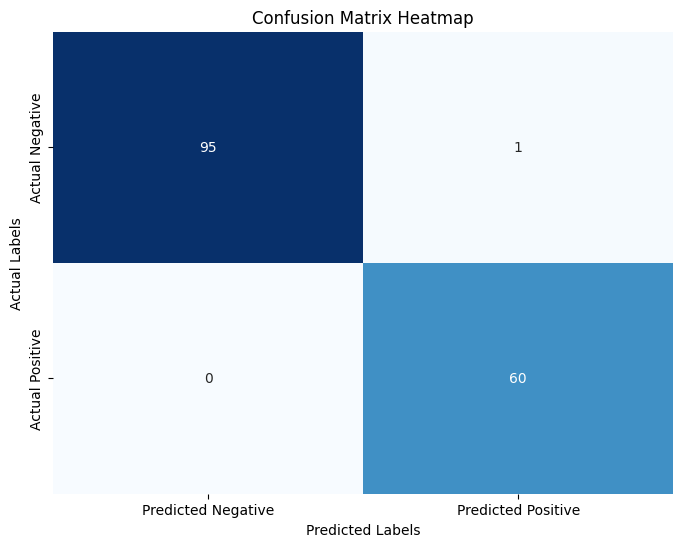

In [ ]:
import numpy as np
import torch
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Predict on test data using PyTorch model
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    outputs = model(X_test_tensor)
    predictions = (outputs > 0.5).float().numpy().flatten()

# Convert y_test_tensor to numpy
y_test_np = y_test_tensor.numpy().flatten()

# Compute confusion matrix
conf_matrix_pt = confusion_matrix(y_test_np, predictions)
report_pt = classification_report(y_test_np, predictions)

print("PyTorch Model Evaluation:")
print("Confusion Matrix:\n", conf_matrix_pt)
print("Classification Report:\n", report_pt)

# Plot heatmap for confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_pt, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()


CROSS VALIDATION


In [ ]:
from sklearn.model_selection import KFold
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Define the number of splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize metrics storage
cv_accuracies = []

# Cross-validation loop
for train_index, val_index in kf.split(X):
    X_train_cv, X_val_cv = X.iloc[train_index], X.iloc[val_index]
    y_train_cv, y_val_cv = y.iloc[train_index], y.iloc[val_index]

    # Convert to PyTorch tensors
    X_train_tensor = torch.tensor(preprocessor.transform(X_train_cv), dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train_cv.values, dtype=torch.float32).unsqueeze(1)
    X_val_tensor = torch.tensor(preprocessor.transform(X_val_cv), dtype=torch.float32)
    y_val_tensor = torch.tensor(y_val_cv.values, dtype=torch.float32).unsqueeze(1)

    # Create DataLoader
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

    # Define model, loss function, and optimizer
    model = AuditFraudModel()  # Reinitialize the model
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Training loop
    for epoch in range(10):
        model.train()
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

    # Evaluation
    model.eval()
    with torch.no_grad():
        outputs = model(X_val_tensor)
        predictions = (outputs > 0.5).float().numpy().flatten()
        accuracy = (predictions == y_val_tensor.numpy().flatten()).mean()
        cv_accuracies.append(accuracy)

print(f"Cross-Validation Accuracies: {cv_accuracies}")
print(f"Mean Cross-Validation Accuracy: {np.mean(cv_accuracies):.2f}")


Cross-Validation Accuracies: [0.9871794871794872, 0.9806451612903225, 0.9741935483870968, 0.967741935483871, 1.0]
Mean Cross-Validation Accuracy: 0.98


In [ ]:
from sklearn.metrics import roc_auc_score, average_precision_score

# Predictions and true values for ROC-AUC and Precision-Recall AUC
y_pred_prob = outputs.numpy().flatten()  # Model outputs as probabilities

# Compute ROC-AUC and Precision-Recall AUC
roc_auc = roc_auc_score(y_val_tensor.numpy().flatten(), y_pred_prob)
pr_auc = average_precision_score(y_val_tensor.numpy().flatten(), y_pred_prob)

print(f"ROC-AUC: {roc_auc:.2f}")
print(f"Precision-Recall AUC: {pr_auc:.2f}")


ROC-AUC: 1.00
Precision-Recall AUC: 1.00


In [ ]:
from sklearn.model_selection import KFold
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Define the number of splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize metrics storage
cv_accuracies = []

# Cross-validation loop
for train_index, val_index in kf.split(X):
    X_train_cv, X_val_cv = X.iloc[train_index], X.iloc[val_index]
    y_train_cv, y_val_cv = y.iloc[train_index], y.iloc[val_index]

    # Convert to PyTorch tensors
    X_train_tensor = torch.tensor(preprocessor.transform(X_train_cv), dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train_cv.values, dtype=torch.float32).unsqueeze(1)
    X_val_tensor = torch.tensor(preprocessor.transform(X_val_cv), dtype=torch.float32)
    y_val_tensor = torch.tensor(y_val_cv.values, dtype=torch.float32).unsqueeze(1)

    # Create DataLoader
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

    # Define the model, loss function, and optimizer
    model = AuditFraudModel()
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Train the model
    for epoch in range(10):
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

    # Validate the model
    with torch.no_grad():
        outputs = model(X_val_tensor)
        predictions = (outputs > 0.5).float()
        accuracy = (predictions == y_val_tensor).float().mean().item()
        cv_accuracies.append(accuracy)

# Output the cross-validated accuracies
print(f"Cross-validated accuracies: {cv_accuracies}")
print(f"Mean cross-validated accuracy: {np.mean(cv_accuracies):.2f}")


Cross-validated accuracies: [0.9935897588729858, 0.9741935729980469, 0.9741935729980469, 0.9548386931419373, 0.9935483932495117]
Mean cross-validated accuracy: 0.98


In [ ]:

import torch.optim as optim

# Define the model
model = AuditFraudModel()

# learning rate
learning_rate = 0.0005
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

#  batch size
batch_size = 64

# DataLoader with new batch size
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)


In [ ]:
class AuditFraudModel(nn.Module):
    def __init__(self):
        super(AuditFraudModel, self).__init__()
        self.fc1 = nn.Linear(in_features, 128)  # Change 128 to your preferred number of units
        self.fc2 = nn.Linear(128, 64)  # Change 64 to your preferred number of units
        self.fc3 = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x


In [ ]:
import torch

# Saving the model
torch.save(model.state_dict(), 'fraud_detection_model.pth')


In [ ]:
pip install Flask


In [ ]:
import torch
import torch.nn as nn

# Define the original model architecture
class AuditFraudModel(nn.Module):
    def __init__(self):
        super(AuditFraudModel, self).__init__()
        # Adjust the dimensions to match the saved model architecture
        self.fc1 = nn.Linear(68, 64)  # Input dimension should match the saved model
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x

# Load the model
model = AuditFraudModel()
model.load_state_dict(torch.load('fraud_detection_model.pth'))
model.eval()


<ipython-input-11-b93894476724>:23: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('fraud_detection_model.pth'))


AuditFraudModel(
  (fc1): Linear(in_features=68, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [ ]:
model.load_state_dict(torch.load('fraud_detection_model.pth', map_location=torch.device('cpu')), strict=False)


<ipython-input-12-d9c1ecf1da59>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('fraud_detection_model.pth', map_location=torch.device('cpu

<All keys matched successfully>

In [ ]:
torch.save(model.state_dict(), 'fraud_detection_model.pth')


In [ ]:
model.load_state_dict(torch.load('fraud_detection_model.pth'))
model.eval()


<ipython-input-14-f7ce5072791a>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('fraud_detection_model.pth'))


AuditFraudModel(
  (fc1): Linear(in_features=68, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [ ]:
import torch

# Define the model class (must match the model used for training)
class AuditFraudModel(nn.Module):
    def __init__(self):
        super(AuditFraudModel, self).__init__()
        self.fc1 = nn.Linear(68, 64)  # Adjust input dimensions if needed
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x

# Instantiate the model and load the trained weights
model = AuditFraudModel()
model.load_state_dict(torch.load('fraud_detection_model.pth'))

# Save the model
torch.save(model.state_dict(), 'fraud_detection_model.pth')


<ipython-input-15-d7b30b315a8b>:21: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('fraud_detection_model.pth'))


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Define the path to save the model in Google Drive
model_path = '/content/drive/My Drive/fraud_detection_model.pth'

# Save the model
torch.save(model.state_dict(), model_path)


Mounted at /content/drive


In [ ]:
from google.colab import files
files.download('fraud_detection_model.pth')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>